In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import time
import math

In [8]:
train = pd.read_csv(r'C:\Users\skme2\Downloads\2129919\train.csv')

In [9]:
test = pd.read_csv(r'C:\Users\skme2\Downloads\2129919\test.csv')

In [10]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
train.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [12]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [13]:
test.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [19]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,233599.0,1.003029e+06,1726.504968,1000001.0,1001527.0,1003070.0,1004477.0,1006040.0
Occupation,233599.0,8.085407e+00,6.521146,0.0,2.0,7.0,14.0,20.0
Marital_Status,233599.0,4.100702e-01,0.491847,0.0,0.0,0.0,1.0,1.0
Product_Category_1,233599.0,5.276542e+00,3.736380,1.0,1.0,5.0,8.0,18.0
Product_Category_2,161255.0,9.849586e+00,5.094943,2.0,5.0,9.0,15.0,18.0
Product_Category_3,71037.0,1.266945e+01,4.125944,3.0,9.0,14.0,16.0,18.0


In [24]:
print("Training data : \nRows : {} ,  columns : {}".format(train.shape[0], train.shape[1]))

Training data : 
Rows : 550068 ,  columns : 12


In [25]:
test.shape

(233599, 11)

In [26]:
test.shape[0]

233599

In [27]:
test.shape[1]

11

In [30]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [31]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [37]:
round((train.isnull().sum()/train.shape[0])*100,2).astype(str) + " %"

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [39]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [46]:
round(train['Age'].value_counts(normalize=True).mul(100),2).astype(str) + " % "

26-35    39.92 % 
36-45     20.0 % 
18-25    18.12 % 
46-50     8.31 % 
51-55      7.0 % 
55+       3.91 % 
0-17      2.75 % 
Name: Age, dtype: object

In [48]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [54]:
round(train['Stay_In_Current_City_Years'].value_counts(normalize=True).mul(100), 2).astype(str) + " %"

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

In [56]:
print(plt.style.available)

['Solarize_Light2', '_classic_test', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


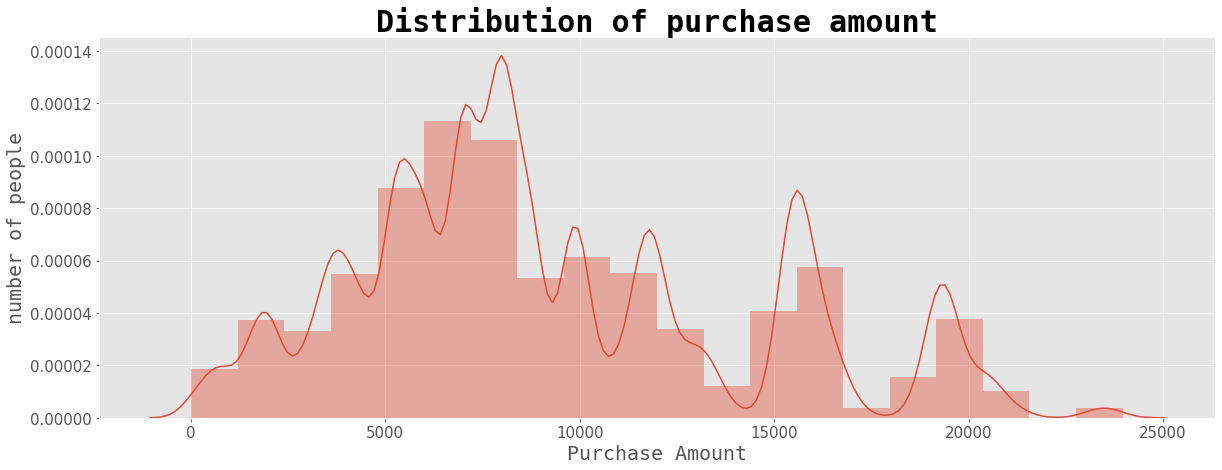

In [66]:
plt.style.use('ggplot')
plt.figure(figsize=(20,7))
sns.distplot(train['Purchase'], bins=20)
plt.title("Distribution of purchase amount", fontdict={'fontname':"Monospace", 'fontsize':30, 'fontweight':'bold'})
plt.xlabel('Purchase Amount', fontdict={'fontname': "Monospace", 'fontsize':20})
plt.ylabel('number of people', fontdict={'fontname':"Monospace", 'fontsize':20})
plt.tick_params(labelsize = 15)
plt.show()

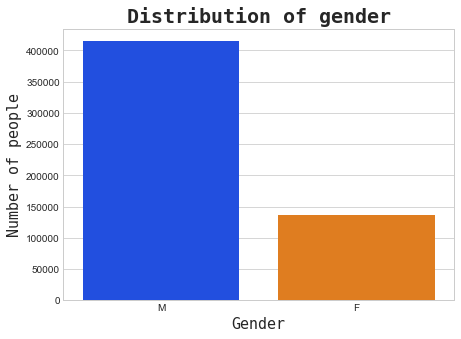

In [86]:
gen = train['Gender'].value_counts()
plt.figure(figsize=(7,5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette='bright')
plt.title("Distribution of gender", fontdict={'fontname':"Monospace", 'fontsize': 20., 'fontweight':'bold'})
plt.xlabel('Gender', fontdict={'fontname':'Monospace', 'fontsize':15})
plt.ylabel('Number of people', fontdict={'fontname':"Monospace", "fontsize":15})
plt.tick_params(labelsize=10)
plt.show()

In [71]:
gen.index

Index(['M', 'F'], dtype='object')

In [72]:
gen.values

array([414259, 135809], dtype=int64)

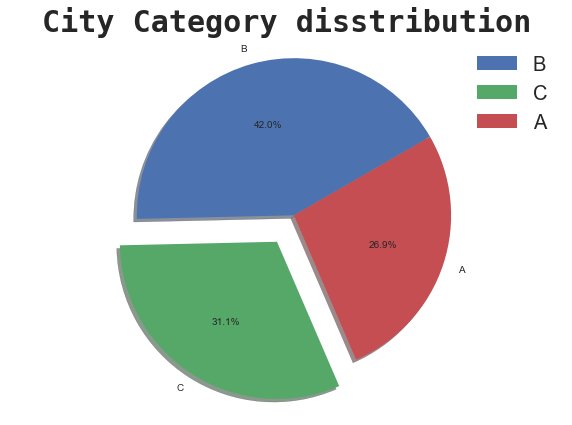

In [109]:
city = train['City_Category'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize=(10,7))
plt.pie(city.values, labels=city.index, startangle=30, explode = (0,0.20,0), shadow=True, autopct = "%1.1f%%")
plt.title('City Category disstribution', fontdict={'fontname':"Monospace", "fontweight":'bold', 'fontsize':30})
plt.legend()
plt.legend(prop = {'size':20})
plt.axis('equal')
plt.show()

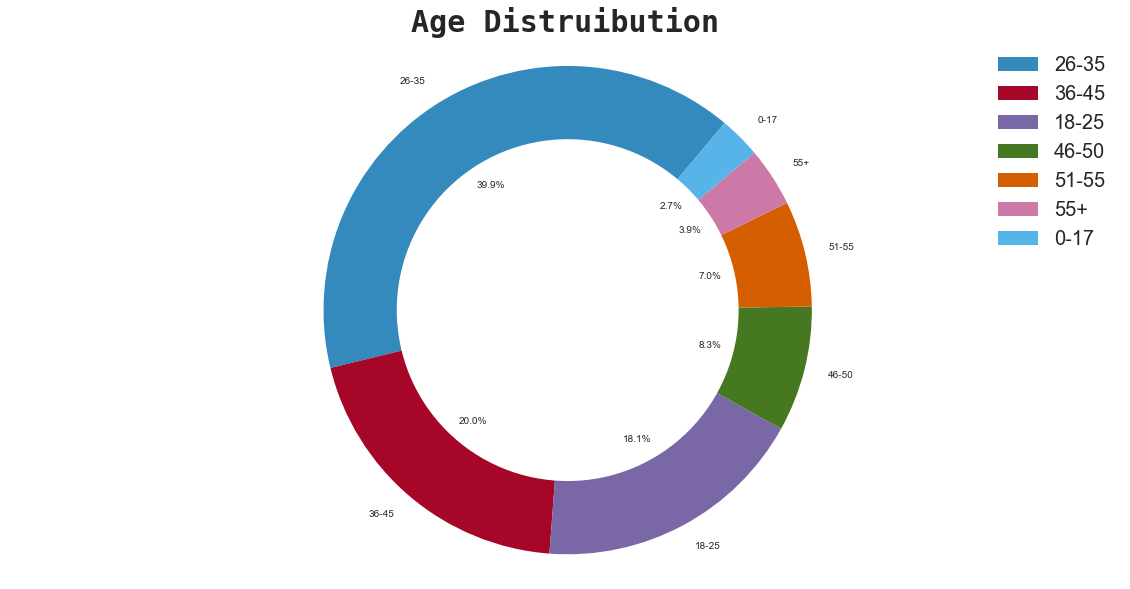

In [126]:
age = train['Age'].value_counts()
plt.style.use('bmh')
plt.figure(figsize=(20,10))
plt.pie(age.values, labels=age.index, startangle=50,autopct="%1.1f%%")
center_circle = plt.Circle((0,0),0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Age Distruibution', fontdict={"fontname":"Monospace", "fontsize":30, 'fontweight':'bold'})
plt.axis('equal')
plt.legend(prop={'size':20})
plt.show()

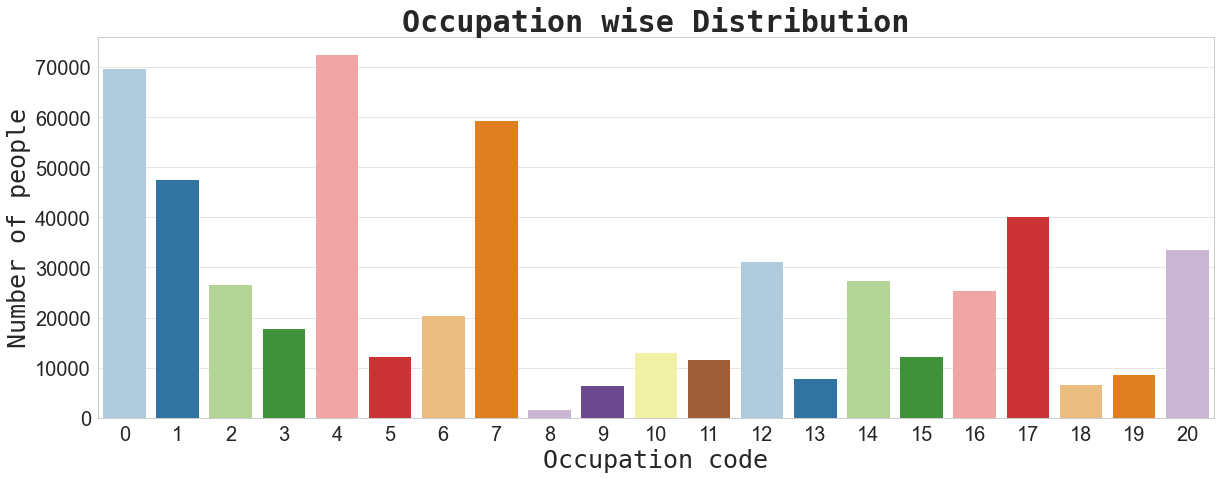

In [136]:
occupation = train['Occupation'].value_counts()
plt.figure(figsize=(20,7))
plt.style.use('seaborn-whitegrid')
sns.barplot(x = occupation.index, y = occupation.values, palette='Paired')
plt.title('Occupation wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.tick_params(labelsize = 20)
plt.show()

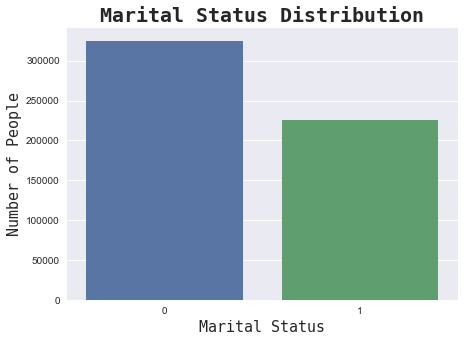

In [149]:
plt.style.use('seaborn')
plt.figure(figsize=(7,5))
sns.countplot(train['Marital_Status'])
plt.title('Marital Status Distribution', fontdict={"fontname":'MonoSpace', "fontweight":'bold', 'fontsize':20})
plt.xlabel("Marital Status", fontdict={"fontname": "Monospace", "fontsize":15})
plt.ylabel('Number of People', fontdict={"fontname":"Monospace", "fontsize":15})
plt.tick_params(labelsize = 10)
plt.show()

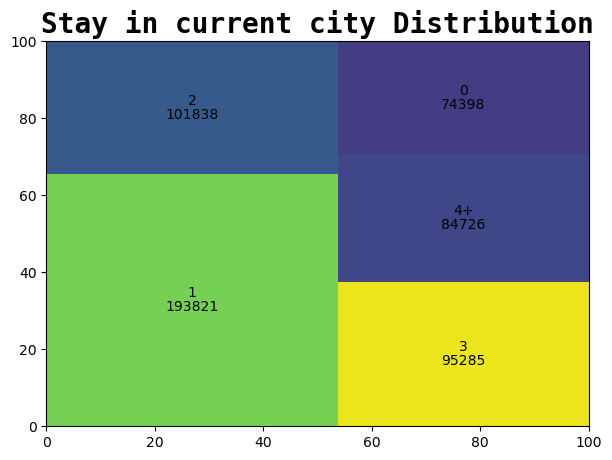

In [160]:
stay = train['Stay_In_Current_City_Years'].value_counts()
import squarify
plt.style.use('default')
plt.figure(figsize=(7,5))
squarify.plot(sizes=stay.values, label=stay.index, value=stay.values)
plt.title("Stay in current city Distribution", fontdict={"fontname":"Monospace", "fontsize":20, 'fontweight':"bold"})
plt.show()

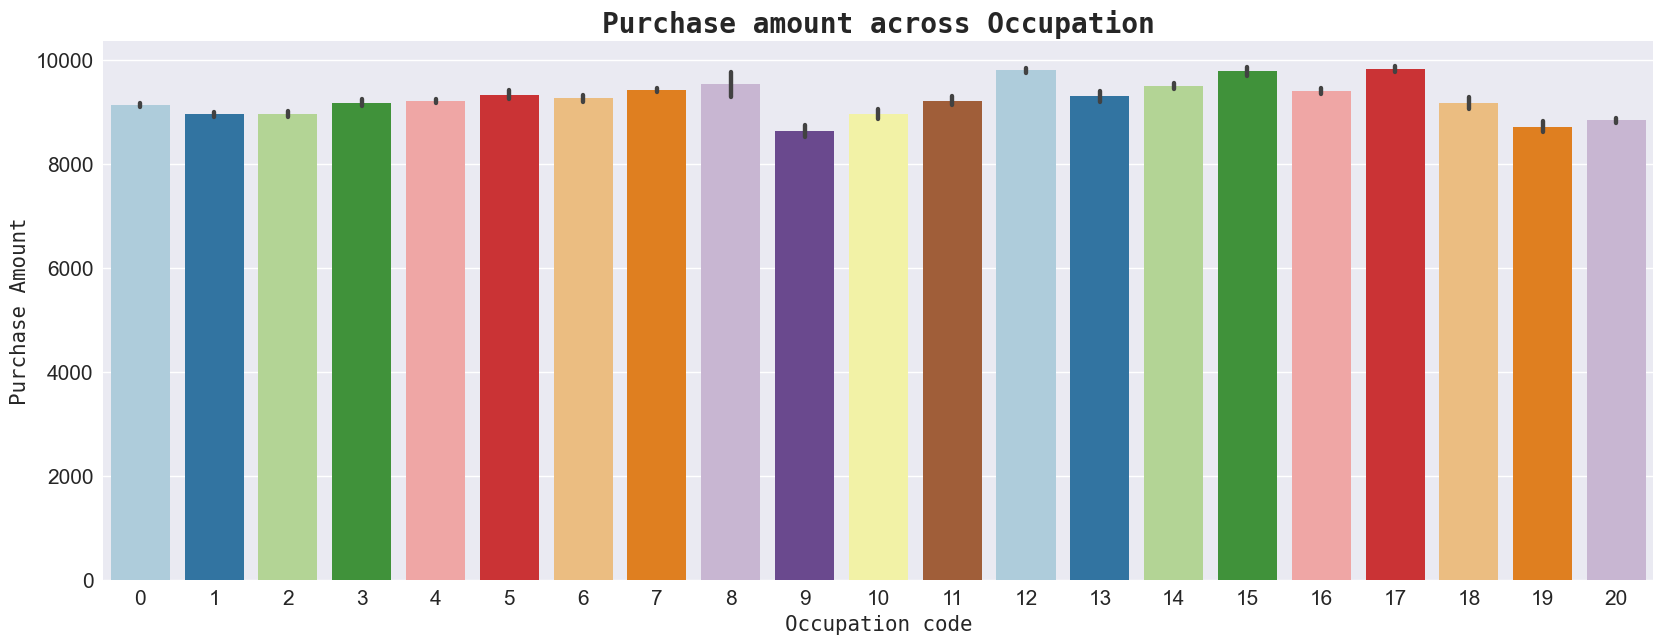

In [171]:
plt.figure(figsize=(20,7))
plt.style.use('seaborn')
sns.barplot(train['Occupation'], train['Purchase'], palette='Paired')
plt.title("Purchase amount across Occupation", fontdict={"fontname":'Monospace', 'fontsize':20, 'fontweight':'bold'})
plt.xlabel('Occupation code', fontdict={'fontname':'Monospace', "fontsize":15})
plt.ylabel('Purchase Amount', fontdict={'fontname':'Monospace', 'fontsize':15})
plt.tick_params(labelsize = 15)
plt.show()

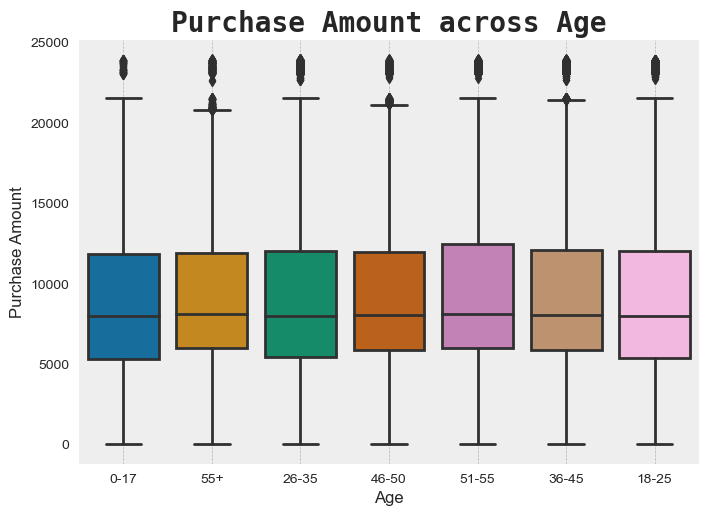

In [182]:
plt.style.use('bmh')
sns.boxplot(train['Age'], train['Purchase'], palette='colorblind')
plt.title('Purchase Amount across Age', fontdict={'fontname':'Monospace', 'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Purchase Amount')
plt.xlabel('Age')
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

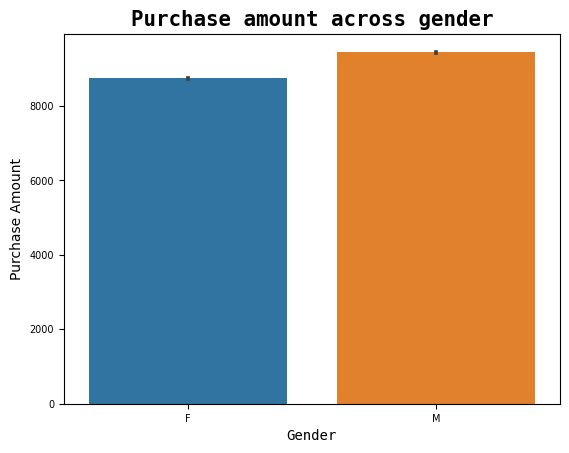

In [192]:
plt.style.use('default')
sns.barplot('Gender', 'Purchase', data=train)
plt.title('Purchase amount across gender', fontdict={'fontname':'Monospace', 'fontsize':15, "fontweight":'bold'})
plt.xlabel('Gender', fontdict={'fontname': 'Monospace', 'fontsize':10})
plt.ylabel('Purchase Amount', fontdict={'fontname':'Monspace', 'fontsize':10})
plt.tick_params(labelsize = 7)
plt.show()

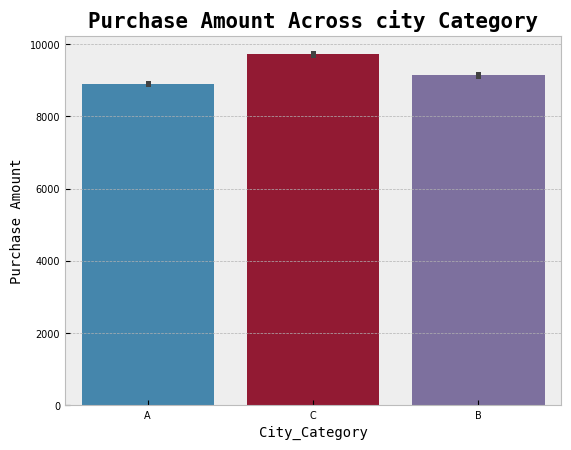

In [202]:
plt.style.use('bmh')
sns.barplot('City_Category', 'Purchase', data=train)
plt.title('Purchase Amount Across city Category', fontdict={'fontname':"Monospace", 'fontsize': 15,'fontweight': 'bold'})
plt.xlabel('City_Category', fontdict={'fontname':'Monospace', 'fontsize':10})
plt.ylabel('Purchase Amount', fontdict = {'fontname':'Monospace', 'fontsize':10})
plt.tick_params(labelsize = 7)
plt.show()

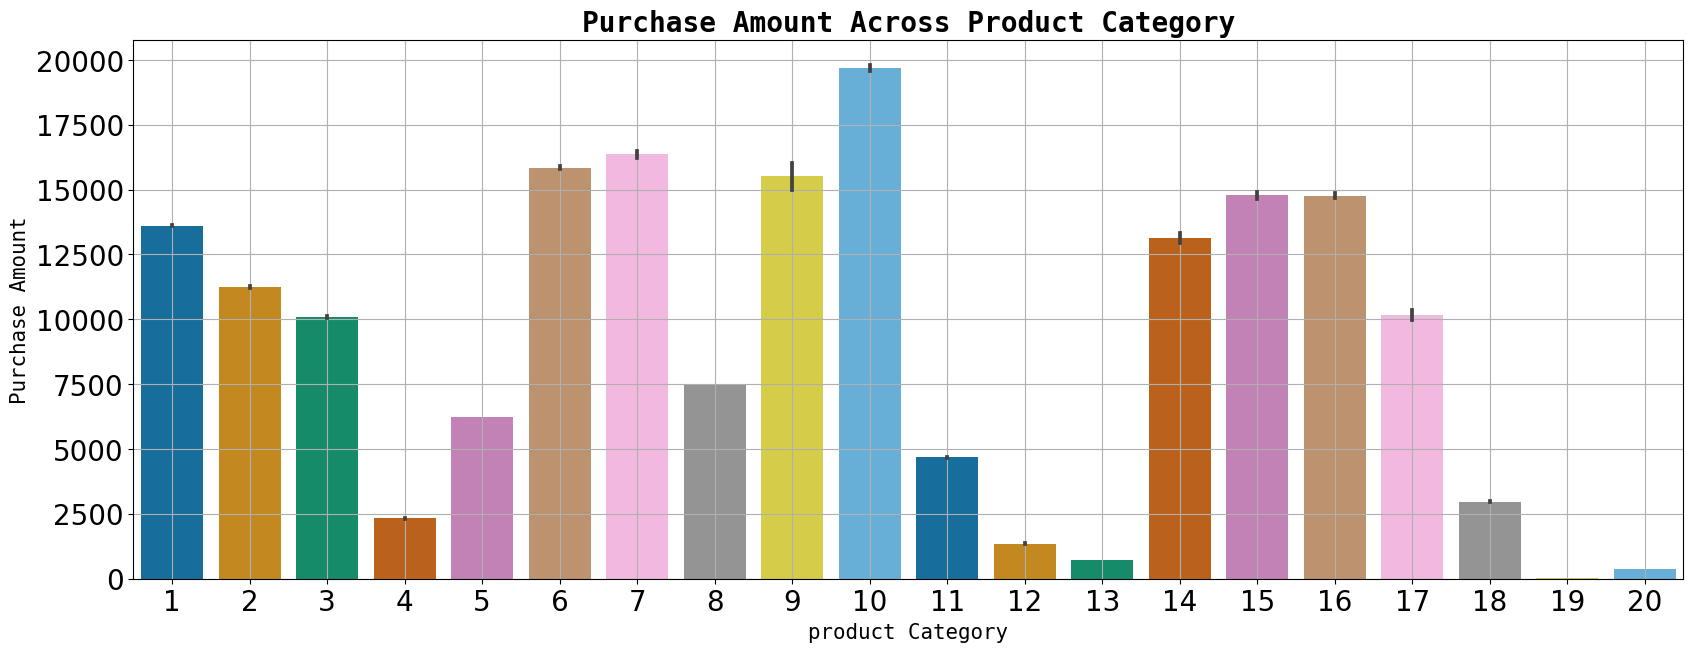

In [207]:
plt.figure(figsize=(20,7))
plt.style.use('default')
sns.barplot('Product_Category_1', 'Purchase', data=train, palette='colorblind')
plt.title('Purchase Amount Across Product Category', fontdict={'fontname':'Monospace', 'fontsize':20, 'fontweight':'bold'})
plt.xlabel('product Category', fontdict={'fontname':'Monospace', 'fontsize':15})
plt.ylabel('Purchase Amount', fontdict={'fontname':'monospace', 'fontsize':15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

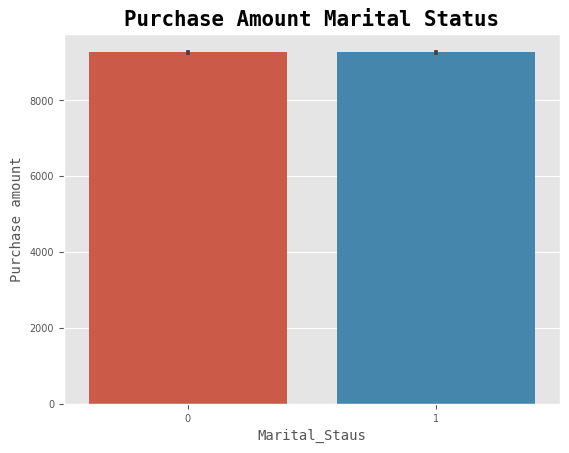

In [217]:
#plt.figure(figsize=(20,7))
plt.style.use('ggplot')
sns.barplot('Marital_Status', 'Purchase', data=train)
plt.title('Purchase Amount Marital Status', fontdict={'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.xlabel('Marital_Staus', fontdict = {'fontname':'Monospace', 'fontsize':10})
plt.ylabel('Purchase amount', fontdict={'fontname':'Monospace', 'fontsize':10})
plt.tick_params(labelsize = 7)
plt.show()

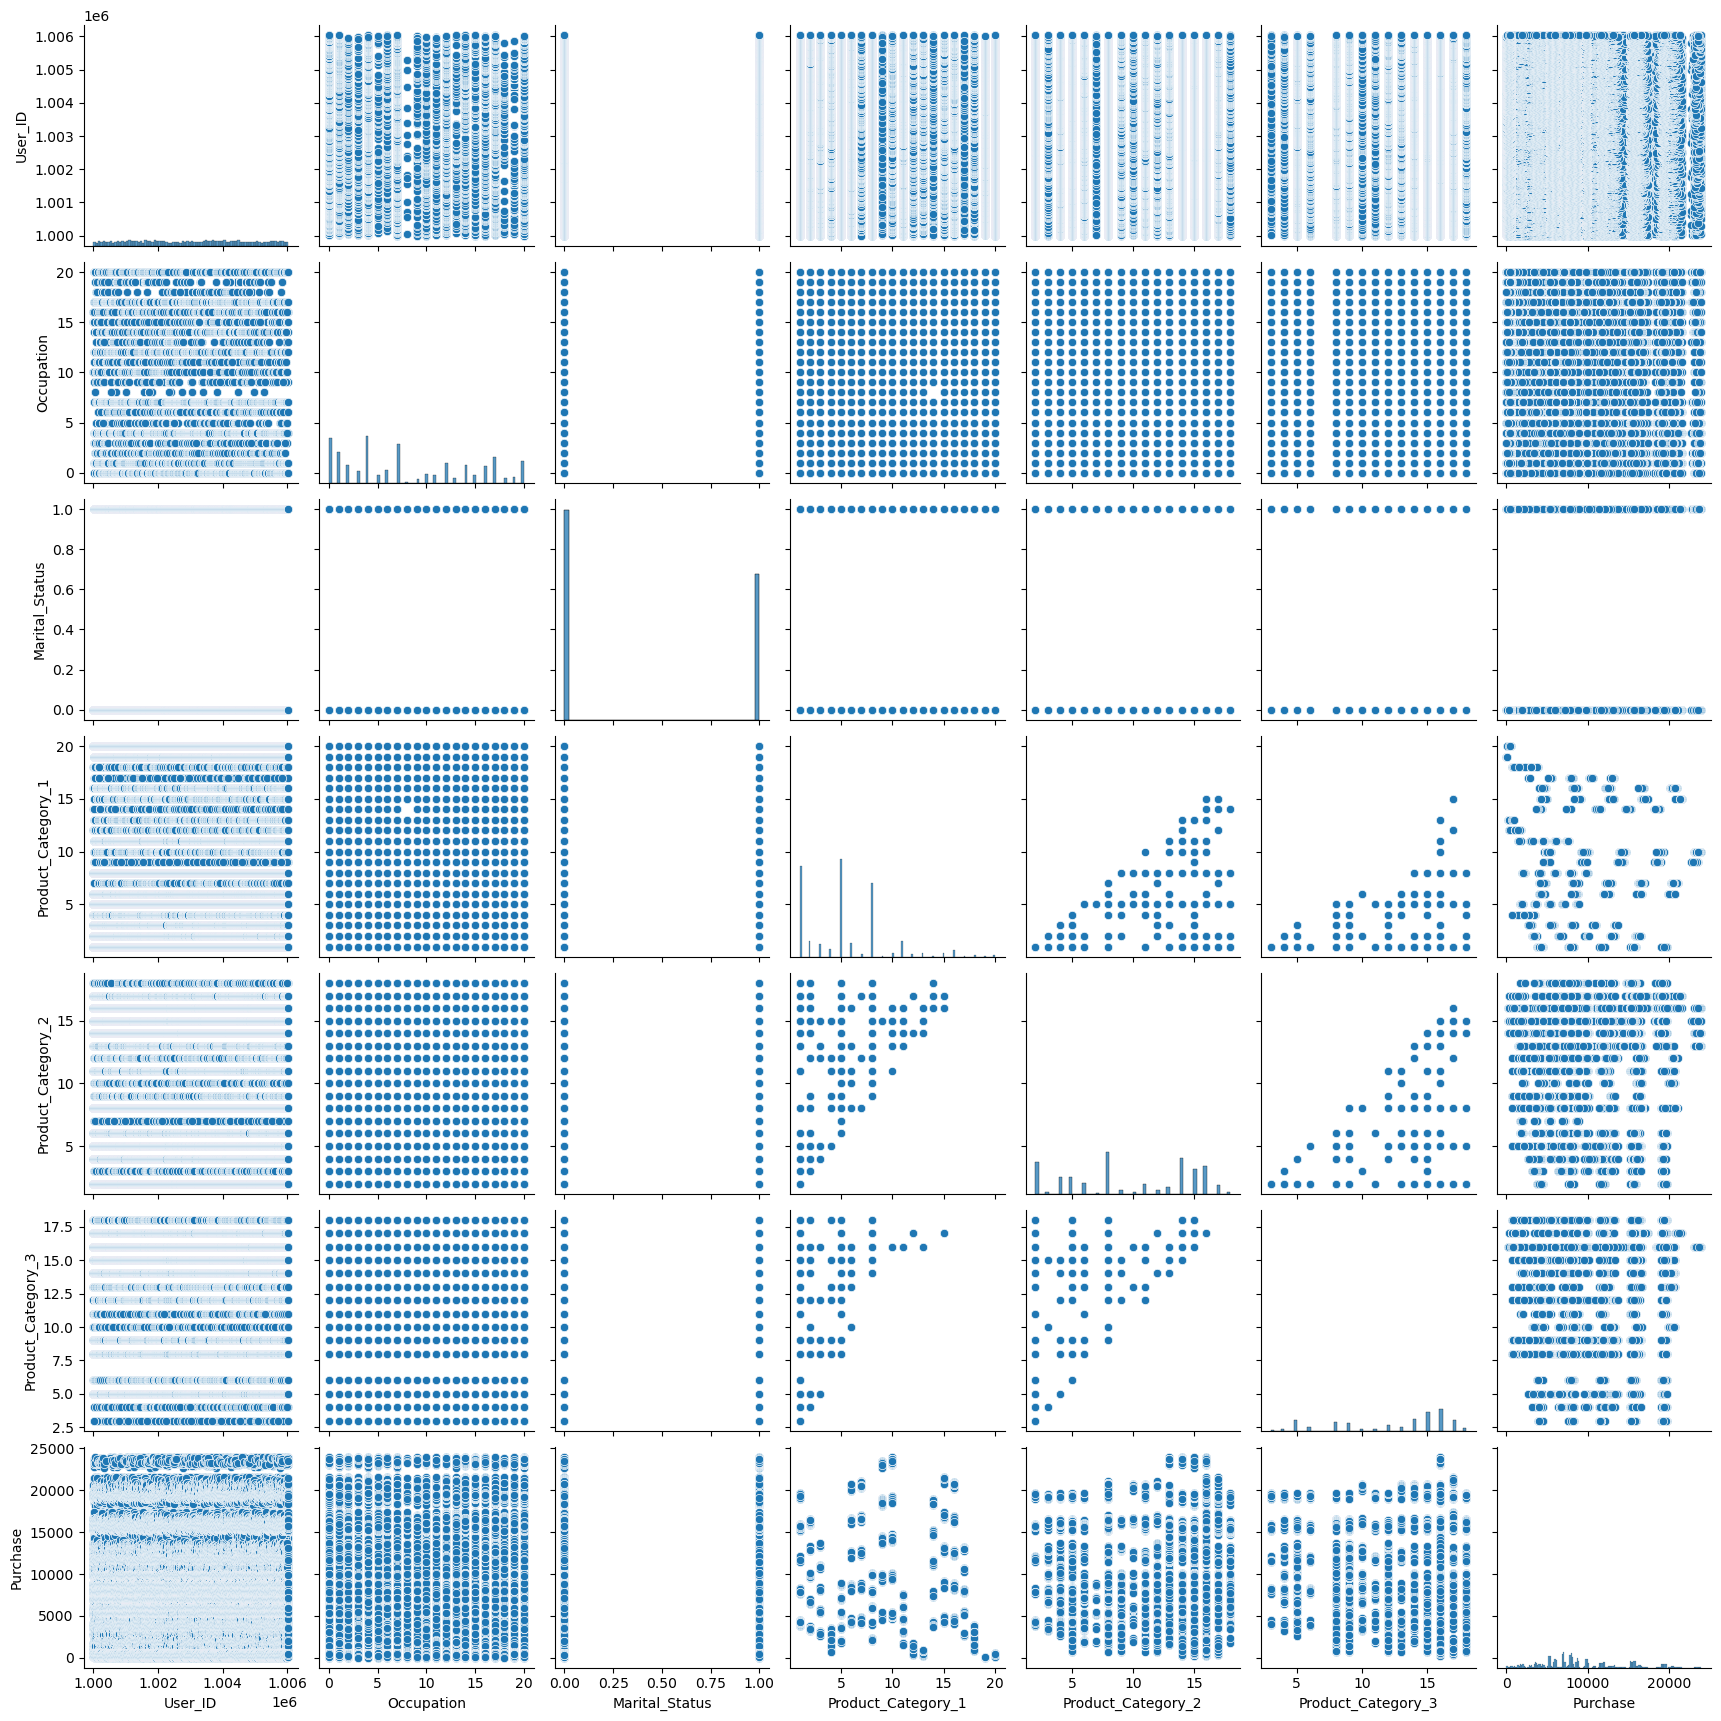

In [220]:
plt.style.use('default')
sns.pairplot(train)
plt.show()

In [221]:
train.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [222]:
test.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,1.000000,-0.023988,0.019883,0.006428,0.004065,0.000316
Occupation,-0.023988,1.000000,0.021872,-0.010465,-0.001685,0.003838
Marital_Status,0.019883,0.021872,1.000000,0.018860,0.021766,0.016119
Product_Category_1,0.006428,-0.010465,0.018860,1.000000,0.540063,0.225054
Product_Category_2,0.004065,-0.001685,0.021766,0.540063,1.000000,0.543417
Product_Category_3,0.000316,0.003838,0.016119,0.225054,0.543417,1.000000


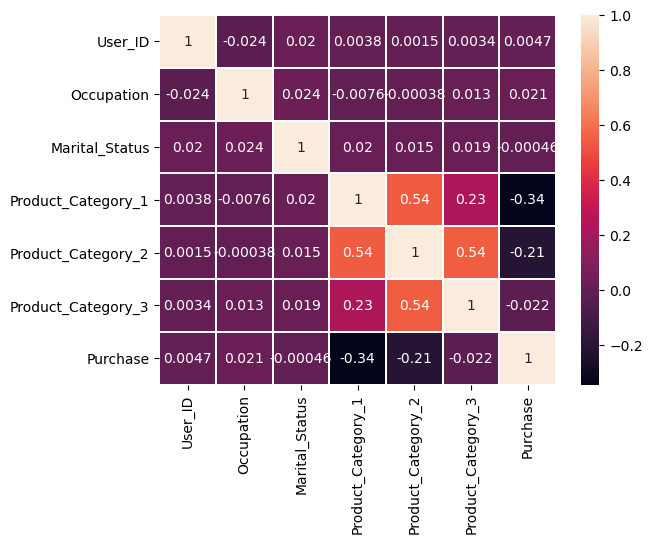

In [226]:
sns.heatmap(train.corr(), annot=True, linewidths=0.7)
plt.show()

<AxesSubplot:>

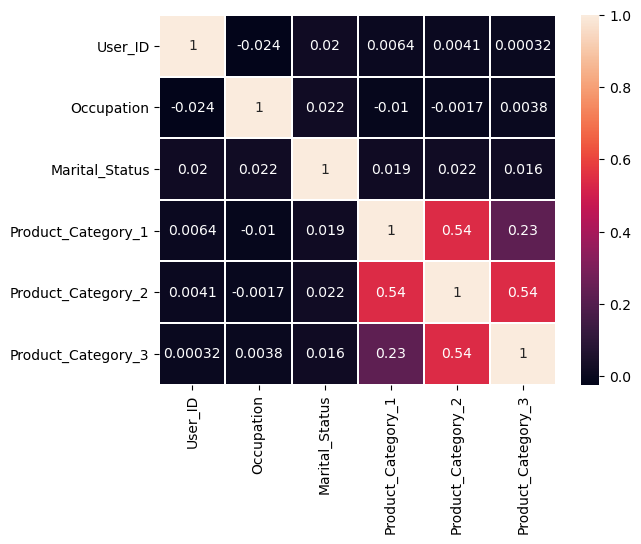

In [227]:
sns.heatmap(test.corr(), linewidths=0.7, annot=True)

In [229]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [230]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [232]:
train['Source'] = 'train'

In [234]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,train


In [236]:
test['Source'] = 'test'

In [237]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Source
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,test
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,test
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,test


In [240]:
dataset = pd.concat([train,test])

In [243]:
dataset['Age'] = dataset['Age'].apply(lambda x:str(x).replace('55+', '55'))

In [248]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(lambda x:str(x).replace('4+', '4'))

In [249]:
dataset.drop('Product_Category_3', axis=1, inplace=True)

In [250]:
dataset.drop('User_ID', axis=1, inplace=True)

In [251]:
dataset.drop('Product_ID', axis=1, inplace=True)

In [252]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [255]:
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])

In [258]:
label_encoder_age = LabelEncoder()
dataset['Age'] = label_encoder_age.fit_transform(dataset['Age'])

In [261]:
label_encoder_city = LabelEncoder()
dataset['City_Category'] = label_encoder_city.fit_transform(dataset['City_Category'])

In [263]:
dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(), inplace=True)

In [266]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('int')

In [271]:
train = dataset.loc[dataset['Source'] == 'train']

In [277]:
test = dataset.loc[dataset['Source'] == 'test']

In [278]:
train.drop('Source', axis=1, inplace=True)

In [279]:
test.drop('Source', axis=1, inplace=True)

In [281]:
y = train.Purchase

In [282]:
x = train.drop('Purchase', axis=1)

In [283]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

In [284]:
selector.fit(x,y)

ExtraTreesRegressor()

In [286]:
feature_imp = selector.feature_importances_

In [289]:
for idx, val in enumerate(feature_imp):
    print(idx, round((val)*100, 2))

0 0.47
1 2.11
2 4.92
3 0.73
4 2.57
5 0.62
6 79.3
7 9.28


In [291]:
x.drop(['Gender', 'City_Category', 'Marital_Status'], axis=1, inplace=True)

In [293]:
x.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,0,10,2,3,9.0
1,0,10,2,1,6.0
2,0,10,2,12,9.0
3,0,10,2,12,14.0
4,6,16,4,8,9.0


In [294]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,9.0,8370.0
1,0,0,10,0,2,0,1,6.0,15200.0
2,0,0,10,0,2,0,12,9.0,1422.0
3,0,0,10,0,2,0,12,14.0,1057.0
4,1,6,16,2,4,0,8,9.0,7969.0


In [309]:
for i in x:
    #IQR
    Q1 = np.percentile(train.loc[:,i],25)
    Q3 = np.percentile(train.loc[:,i],75)
    
    IQR = Q3-Q1
    
    print("Old Shape : ", train.loc[:,i].shape)
    
    #Upper Bound
    upper = np.where(train.loc[:,i]>=(Q3+2.5*IQR))
    
    # Lower Bound
    lower = np.where(train.loc[:,i]<=(Q1-2.5*IQR))
    
    print("{}--{}".format(upper,lower))
    
    try:
        train.drop(upper[0])
    except:
        print("keyError : {} not found in axis".format(upper[0]))
        
    try:
        train.drop(lower[0])
    except:
        print("KeyError : {} not found in axis".format(lower[0]))

Old Shape :  (550068,)
(array([     4,    159,    160, ..., 550008, 550030, 550066], dtype=int64),)--(array([], dtype=int64),)
Old Shape :  (550068,)
(array([], dtype=int64),)--(array([], dtype=int64),)
Old Shape :  (550068,)
(array([], dtype=int64),)--(array([], dtype=int64),)
Old Shape :  (550068,)
(array([], dtype=int64),)--(array([], dtype=int64),)
Old Shape :  (550068,)
(array([], dtype=int64),)--(array([], dtype=int64),)


In [311]:
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [315]:
for col in x.columns:
    x[col] = scaler.fit_transform(x[col].values.reshape(-1,1))

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [318]:
X_train.shape

(440054, 5)

In [319]:
X_test.shape

(110014, 5)

In [320]:
y_test.shape

(110014,)

In [321]:
y_train.shape

(440054,)

In [322]:
from sklearn.linear_model import LinearRegression

In [323]:
lin_reg = LinearRegression()

In [324]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [325]:
y_pred_inreg = lin_reg.predict(X_test)

In [326]:
from sklearn.neighbors import KNeighborsRegressor

In [327]:
knn = KNeighborsRegressor()

In [328]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [329]:
y_pred_knn = knn.predict(X_test)

In [330]:
from sklearn.tree import DecisionTreeRegressor

In [331]:
dec_tree_reg = DecisionTreeRegressor()

In [332]:
dec_tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [333]:
y_pred_dec = dec_tree_reg.predict(X_test)

In [334]:
from sklearn.ensemble import RandomForestRegressor

In [335]:
random_reg = RandomForestRegressor()

In [336]:
random_reg.fit(X_train,y_train)

RandomForestRegressor()

In [337]:
y_pred_random = random_reg.predict(X_test)

In [338]:
from xgboost import XGBRegressor

In [339]:
xgb = XGBRegressor(random_state=42)

In [340]:
xgb.fit(X_train,y_train)

[15:16:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

In [341]:
y_pred_xgb = xgb.predict(X_test)

In [342]:
from sklearn.metrics import r2_score, mean_squared_error

In [346]:
round(mean_squared_error(y_test,y_pred_inreg), 2)

22085054.68

In [347]:
round(np.sqrt(mean_squared_error(y_test,y_pred_inreg)),2)

4699.47

In [350]:
round(r2_score(y_test,y_pred_inreg), 5)

0.12103

In [351]:
mean_squared_error(y_test,y_pred_knn)

10742488.232055558

In [352]:
np.sqrt(mean_squared_error(y_test,y_pred_knn))

3277.5735280929334

In [353]:
r2_score(y_test,y_pred_knn)

0.5724583579516003

In [354]:
from sklearn import metrics

In [355]:
metrics.mean_absolute_error(y_test,y_pred_knn)

2408.2722235351866

In [356]:
mean_squared_error(y_test,y_pred_dec)

9396290.649367739

In [357]:
np.sqrt(mean_squared_error(y_test,y_pred_dec))

3065.3369552738795

In [358]:
metrics.mean_absolute_error(y_test,y_pred_dec)

2268.461917054133

In [359]:
r2_score(y_test,y_pred_dec)

0.6260358450840953

In [360]:
mean_squared_error(y_test,y_pred_random)

9192682.399613926

In [361]:
metrics.mean_absolute_error(y_test,y_pred_random)

2253.1282838277166

In [362]:
r2_score(y_test,y_pred_random)

0.6341392754583158

In [363]:
mean_squared_error(y_test,y_pred_xgb)

9149840.384117464

In [364]:
metrics.mean_absolute_error(y_test,y_pred_xgb)

2290.4201510387406

In [365]:
r2_score(y_test,y_pred_xgb)

0.6358443502285505

In [367]:
from sklearn.model_selection import RandomizedSearchCV

In [371]:
max_depth = [int(x) for x in np.linspace(start=5,stop=20, num= 15)]

In [372]:
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']

In [373]:
mid_child_weight = [int(x) for x in np.linspace(start=45,stop=70, num=15)]

In [374]:
params = {
    'learning_rate':learning_rate,
    'max_depth': max_depth,
    "min_child_weight" : mid_child_weight,
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [375]:
xgb_tuning = XGBRegressor(verbosity=0, random_state=42)

In [376]:
xgb_cv = RandomizedSearchCV(xgb_tuning, param_distributions=params, cv=5, random_state=42)

In [377]:
xgb_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=XGBRegressor(random_state=42, verbosity=0),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': ['0.01', '0.05', '0.1',
                                                          '0.25', '0.5', '0.75',
                                                          '1.0'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      20],
                                        'min_child_weight': [45, 46, 48, 50, 52,
                                                             53, 55, 57, 59, 61,
                                                             62, 64, 66, 68,
                 

In [378]:
xgb_cv.best_score_

0.6512790374175359

In [379]:
xgb_cv.best_params_

{'min_child_weight': 66,
 'max_depth': 11,
 'learning_rate': '1.0',
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [381]:
xgb_best = XGBRegressor(min_child_weight=66, learning_rate=11, gamma=0.3, colsample_bytree=0.7,max_depth = 11)

In [382]:
xgb_best.fit(X_train,y_train)

[15:48:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, gamma=0.3, learning_rate=11, max_depth=11,
             min_child_weight=66)

In [383]:
y_pred_xgb_best = xgb_best.predict(X_test)

In [384]:
mean_squared_error(y_test,y_pred_xgb_best)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').